In [1]:
import pickle


def leer_archivo_binario(ruta_archivo):
    with open(ruta_archivo, 'rb') as f:
        return pickle.load(f)
    
def escribir_archivo_binario(objeto, nombre_archivo):
    with open(nombre_archivo, 'wb') as f:
        pickle.dump(objeto, f)
    

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def ver_distribuciones(dtf, feature_name, target_name):

    x, y = feature_name, target_name
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(x, fontsize=12)
    for i in dtf[y].unique():
        sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                     bins=10, hist_kws={"alpha":0.8}, 
                     axlabel="histogram", ax=ax[0])
        sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                     kde_kws={"shade":True}, axlabel="density",   
                     ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(dtf[y].unique())
    ax[1].grid(True)
    plt.show()
    
def correlaciones(data):
    corr_matrix = data.corr()
    sorted_mat = corr_matrix.unstack().sort_values()
    return sorted_mat
    
    #sns.heatmap(np.where(corr_matrix > 0.75, annot=True, cmap='YlGnBu', vmax=1, vmin=1))
    #plt.title('Heatmap corr')
    #plt.show()
    
    
    
# IQR (Rangos Interquartílicos)

def IQR_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [ ]:
vine_dataset = leer_archivo_binario('vine_datapack_v2.3.pkl')

In [3]:
# RESERVED FOR LOADING ESENTIAL PICKLE FILES

new_dataset = leer_archivo_binario('new_dataset.pkl')

rfe = leer_archivo_binario('rfe_model.pkl')

pca = leer_archivo_binario('pca_model.pkl')

PC_notduplicates = leer_archivo_binario('pca_mainfeatures.pkl')

In [4]:
import pandas as pd

vine_dataset = pd.read_csv('vine_dataset.csv')

In [4]:
# ESTRUCTURA DATASET

vine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56199 entries, 0 to 56198
Columns: 448 entries, Unnamed: 0 to session_comments_doc2vec_100
dtypes: float64(437), int64(11)
memory usage: 192.1 MB


In [5]:
# CONTABILIZAR CASOS LABEL AGRUPANDO POR SESSION_ID

g1 = vine_dataset[vine_dataset['label'] == 1].groupby(['session_id']).size()

g1 = g1.to_frame()


g2 = vine_dataset[vine_dataset['label'] == 0].groupby(['session_id']).size()
g2 = g2.to_frame()

print(pd.merge(g1,g2,how='inner',on=['session_id']))


# SE CONCLUYE QUE NO HAY AGREGACIÓN DE VALORES DE LABEL (P.EJ, 0 EN PRIMERA MITAD Y 1 EN SEGUNDA), PERO SE VE
# QUE CIERTOS SESSION_ID CONTIENEN LABEL DE UN SÓLO VALOR, EN VEZ DE TENER TANTO 0 COMO 1.

Empty DataFrame
Columns: [0_x, 0_y]
Index: []


In [ ]:
ver_distribuciones(vine_dataset, "session_id", "label")

In [ ]:
standard_session_id = []
std_id = 32761
session_id_visited = 698432761

for index, row in vine_dataset.iterrows():
    if row['session_id'] == session_id_visited:
        standard_session_id.append(std_id)
    else:
        std_id = std_id + 1
        session_id_visited = row['session_id']
        standard_session_id.append(std_id)
        
dataset_withstdid = vine_dataset.copy()

dataset_withstdid["stdid"] = standard_session_id

dataset_withstdid

In [ ]:
#ver_distribuciones(dataset_withstdid.groupby(['stdid']).first().reset_index(), "stdid", "label")

ver_distribuciones(dataset_withstdid, "stdid", "label")

In [ ]:
lessthan35k_dataset = vine_dataset[vine_dataset["Unnamed: 0"] < 35000]



ver_distribuciones(lessthan35k_dataset, "session_id", "label")

In [ ]:
#session_id_dataset = vine_dataset[vine_dataset["Unnamed: 0"] < 35000].groupby(['session_id']).first().reset_index()
session_id_dataset = vine_dataset.groupby(['session_id']).first().reset_index()
session_id_dataset
#ver_distribuciones(session_id_dataset, "session_id", "label")

In [ ]:

# FOR FILTER COLUMNS

filtered_columns = vine_dataset.filter(regex="tfidf.*|doc2vec.*").columns.values

filtered_columns

vine_filtered = vine_dataset.drop(filtered_columns, axis=1)


#matriz_corr = correlaciones(vine_filtered)



In [ ]:
# CORRELATION MATRIX

matriz_corr = correlaciones(vine_dataset)

In [ ]:
# PARA IMPRIMIR LA MATRIZ COMPLETA

print(matriz_corr[(abs(matriz_corr) > 0.95) & (abs(matriz_corr) < 1)])

#print(matriz_corr[(abs(matriz_corr) > 0.998772) & (abs(matriz_corr) < 0.998780)])




In [ ]:
# PARA FILTRAR VALORES 

matriz_corr_filtered = matriz_corr[(matriz_corr.index.get_level_values(1).isin(['label']))]
#print(matriz_corr_filtered[(abs(matriz_corr_filtered) > 0.2) & (abs(matriz_corr_filtered) < 1)])

# PARA OBTENER UNA CORRELACION CONCRETA CON LABEL
print(matriz_corr_filtered[(matriz_corr_filtered.index.get_level_values(0).isin(['session_id']))])


In [ ]:
# REEMPLAZAR SESSION_ID POR VALORES PSEUDOALEATORIOS

from random import seed
from random import randint

new_id_list = []

seed(1)

for _ in range(len(vine_dataset['session_id'])):
    new_id_list.append(randint(1, 747))
    
new_id_list

In [ ]:
new_dataset = vine_dataset.copy()

new_dataset["new_session_id"] = new_id_list

new_dataset["session_id"] = new_dataset["new_session_id"].values

new_dataset = new_dataset.drop(["new_session_id"], axis="columns")

new_dataset

In [ ]:
vine_dataset

C:\Users\mauro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mauro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mauro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

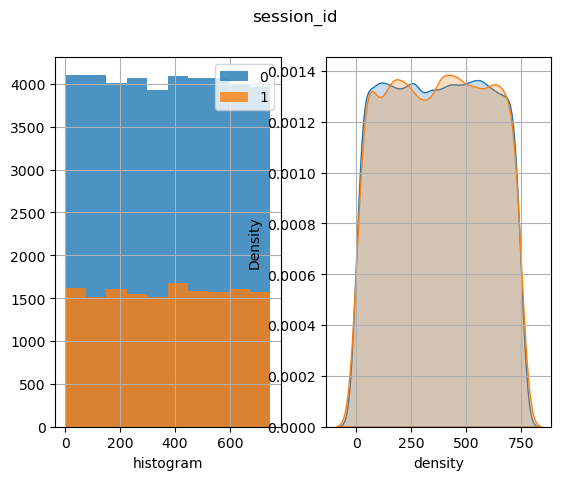

In [7]:
#vine_dataset.groupby(['session_id']).size()
ver_distribuciones(new_dataset, "session_id", "label")

In [ ]:
# SAVE NEW DATAFRAME TO A PICKLE FILE

new_dataset.to_pickle("new_dataset.pkl")

In [5]:
from sklearn.model_selection import train_test_split


# DIVIDIR DATASET EN CONJUNTOS DE TRAIN Y TEST


# 1 = Comprension de datos (usamos vine_dataset), 2 = Preparar datos (usamos new_dataset)
fase = 2 

if fase == 1:
    y = vine_dataset["label"]
    X = vine_dataset.drop(["label"], axis=1)
else:
    y = new_dataset["label"]
    X = new_dataset.drop(["label"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)









In [14]:
escribir_archivo_binario(y_test, 'y_test.pkl')

In [6]:
X_train

,Unnamed: 0,session_id,comment_id,likes,this_comment_n_words,session_comments_n_words,this_comment_pct_profane_words,session_comments_pct_profane_words,session_pct_rude_comments,this_comment_polarity,...,session_comments_doc2vec_91,session_comments_doc2vec_92,session_comments_doc2vec_93,session_comments_doc2vec_94,session_comments_doc2vec_95,session_comments_doc2vec_96,session_comments_doc2vec_97,session_comments_doc2vec_98,session_comments_doc2vec_99,session_comments_doc2vec_100
22274,22274,106,42,1000,8,265,0.000000,0.064151,0.285714,0.250000,...,0.195942,0.305190,0.401742,-0.362092,-0.228446,-0.541968,0.527637,-0.863058,0.107400,-1.516618
53602,53602,586,12,12292,6,54,0.500000,0.055556,0.083333,-0.900000,...,-0.313900,-0.276601,0.052639,0.622827,0.049623,-0.188133,0.248322,0.349393,0.364028,0.443663
28809,28809,348,43,2237,4,245,0.000000,0.061224,0.186047,0.000000,...,-0.260761,-0.711974,-0.232354,0.117050,0.252321,-0.434961,-0.039503,-0.103726,0.911696,-0.345746
42715,42715,661,29,2229,1,114,0.000000,0.017544,0.068966,0.000000,...,-1.654990,-0.076858,0.143158,-0.461724,-0.981620,0.123591,0.524086,0.154125,0.094823,-0.508638
40045,40045,656,3,378,4,8,0.000000,0.125000,0.333333,0.000000,...,0.237058,0.147290,-0.138048,-0.084174,0.066864,0.049887,-0.157194,0.157131,-0.163926,-0.228605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50502,50502,128,59,1113,2,246,0.000000,0.004065,0.016949,0.000000,...,-0.479887,-0.174512,-0.608152,0.169059,0.447284,0.311692,-0.546390,-1.100315,0.282739,-0.365501
49375,49375,545,74,10191,3,437,0.000000,0.032037,0.148649,0.250000,...,0.232982,-0.303353,-0.404543,0.026424,-0.132495,-0.431463,0.316530,0.930050,-0.764511,-0.249582
21921,21921,586,196,1723,6,823,0.166667,0.041312,0.158163,0.000000,...,-0.186142,0.103854,0.308920,0.247762,0.187380,0.185051,0.098770,0.764998,-0.769634,-0.917756
2899,2899,390,17,1817,9,117,0.333333,0.136752,0.588235,-0.288889,...,-0.378261,-0.221242,0.700558,0.485424,0.624670,-0.245315,-0.483212,-0.088455,-0.743714,-0.401156


# FASE 1: COMPRENSIÓN DATOS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RANDOM FOREST FEATURE IMPORTANCE

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

In [ ]:
feature_names = X.columns.values
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

forest_importances

#forest_importances[(forest_importances > 0.0045)]

In [ ]:
# OBTENER UNA FEATURE IMPORTANCE CONCRETA

forest_importances[(forest_importances.index == 'this_comment_doc2vec_57')]

In [ ]:
# PROBAR A ELIMINAR CARACTERISTICAS DEL DATASET EN BASE A LA CORRMATRIX Y A F_IMPORTANCE DE RANDOMFOREST

vine_dataset_reduced = vine_dataset.copy()

X_train_reduced = X_train.copy()

In [ ]:
#drop_columns = ['session_comments_tfidf_60', 'session_comments_tfidf_58', 'this_comment_doc2vec_18', 
#'this_comment_doc2vec_25', 'this_comment_doc2vec_40']

#drop_columns = ['this_comment_doc2vec_6', 'this_comment_doc2vec_34', 'this_comment_doc2vec_57', 
#'this_comment_tfidf_22', 'this_comment_tfidf_23', 'this_comment_tfidf_56']

#drop_columns = ['this_comment_doc2vec_23', 'this_comment_doc2vec_38', 'this_comment_doc2vec_51', 
#'this_comment_doc2vec_62', 'session_comments_tfidf_45', 'session_comments_tfidf_71']

#drop_columns = ['this_comment_doc2vec_17', 'this_comment_doc2vec_21', 'this_comment_doc2vec_24', 
#'this_comment_doc2vec_80','this_comment_doc2vec_82']

#drop_columns = ['this_comment_doc2vec_20', 'this_comment_doc2vec_41', 'this_comment_doc2vec_58', 
#'this_comment_doc2vec_59','this_comment_doc2vec_72', 'this_comment_doc2vec_92']

#drop_columns = ['this_comment_doc2vec_53', 'this_comment_doc2vec_71', 'this_comment_doc2vec_76', 
#'this_comment_doc2vec_89', 'this_comment_doc2vec_95']

#drop_columns = ['this_comment_doc2vec_1', 'this_comment_doc2vec_3', 'this_comment_doc2vec_4', 
#'this_comment_doc2vec_63','this_comment_doc2vec_75', 'this_comment_doc2vec_86']

#drop_columns = ['this_comment_doc2vec_16', 'this_comment_doc2vec_22', 'this_comment_doc2vec_48', 'this_comment_doc2vec_60']

#drop_columns = ['this_comment_doc2vec_2', 'this_comment_doc2vec_7', 'this_comment_doc2vec_9', 
#'this_comment_doc2vec_11','this_comment_doc2vec_49', 'this_comment_doc2vec_66']

#drop_columns = ['this_comment_doc2vec_12', 'this_comment_doc2vec_39', 'this_comment_doc2vec_65', 
#'this_comment_doc2vec_67','this_comment_doc2vec_70']

#drop_columns = ['this_comment_tfidf_54', 'this_comment_tfidf_55', 'this_comment_doc2vec_35', 
#'this_comment_doc2vec_37','this_comment_doc2vec_43', 'this_comment_doc2vec_73', 'this_comment_doc2vec_90']

#drop_columns = ['this_comment_doc2vec_44', 'this_comment_doc2vec_45', 'this_comment_doc2vec_68', 
#'this_comment_doc2vec_88','this_comment_doc2vec_93', 'this_comment_doc2vec_94']

#drop_columns = ['this_comment_doc2vec_32', 'this_comment_doc2vec_33', 'this_comment_doc2vec_47', 'this_comment_doc2vec_81']
#drop_columns = ['this_comment_doc2vec_13', 'this_comment_doc2vec_15', 'this_comment_doc2vec_27', 
#'this_comment_doc2vec_42','this_comment_doc2vec_64']

#drop_columns = ['this_comment_doc2vec_29', 'this_comment_doc2vec_36', 'this_comment_doc2vec_52', 
#'this_comment_doc2vec_55','this_comment_doc2vec_69', 'this_comment_doc2vec_87']

#drop_columns = ['this_comment_doc2vec_8', 'this_comment_doc2vec_19', 'this_comment_doc2vec_79', 
#'this_comment_doc2vec_85','this_comment_doc2vec_91', 'this_comment_doc2vec_99']

#drop_columns = ['this_comment_n_words', 'this_comment_doc2vec_14', 'this_comment_doc2vec_31', 'this_comment_doc2vec_46',
#'this_comment_doc2vec_50', 'this_comment_doc2vec_56', 'this_comment_doc2vec_74', 'this_comment_doc2vec_77']

#drop_columns = ['session_comments_tfidf_70']



vine_dataset_reduced = vine_dataset_reduced.drop(columns=drop_columns)

X_train_reduced = X_train_reduced.drop(columns=drop_columns)

In [ ]:
vine_dataset_reduced

In [ ]:
X_train_reduced

In [ ]:
# RECALCULAR CORRMATRIX

matriz_corr_reduced = correlaciones(vine_dataset_reduced)

print(matriz_corr_reduced[(abs(matriz_corr) > 0.95) & (abs(matriz_corr) < 1)])


In [ ]:
print(matriz_corr_reduced[(matriz_corr_reduced.index.get_level_values(1).isin(['label'])) & (matriz_corr_reduced.index.get_level_values(0).isin(['session_comments_tfidf_44']))])

In [ ]:
# RECALCULAR FEATURE IMPORTANCE

forest.fit(X_train_reduced, y_train)

feature_names = X_train_reduced.columns.values
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)

forest_importances

In [ ]:
forest_importances[(forest_importances.index == 'this_comment_doc2vec_46')]

In [ ]:
# RANGOS INTERQUARTILICOS

IQR_columns = vine_dataset.filter(regex="tfidf.*|doc2vec.*").columns.values

outliers = IQR_outliers(vine_dataset[IQR_columns])

outliers

In [ ]:
outliers[outliers.notna() == True].count()

In [13]:
# ISOLATION FOREST

from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.05),n_jobs=-1,random_state=0)

model_IF.fit(X_train)

C:\Users\mauro\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, n_jobs=-1, random_state=0)

In [ ]:
IF_scores = model_IF.score_samples(X)

In [14]:
IF_anomalyscore = model_IF.decision_function(X)



In [15]:
# REVISANDO ATIPICOS CON ANOMALY SCORE


IF_anomalies = list(IF_anomalyscore)

IF_anomalies = filter(lambda score: score < 0, IF_anomalies)

print(len(list(IF_anomalies)))

2828


In [16]:
# CALCULANDO VALOR MÁXIMO DE ANOMALIES (UMBRAL ATIPICOS)

anomaly_list = []

for score in IF_anomalyscore:
    if score < 0:
        anomaly_list.append(score)
        
anomaly_umbral = min(anomaly_list)


In [17]:
anomaly_umbral

-0.07437730640853085

In [ ]:
# CALCULAR EL WHISKER INFERIOR

IF_q1 = np.percentile(IF_scores, [25])
IF_q3 = np.percentile(IF_scores, [75])

IF_IQR = IF_q3 - IF_q1

whisker = IF_q1 - 1.5*IF_IQR

whisker

In [ ]:
# CALCULAR CUANTOS VALORES SON CONSIDERADOS OUTLIERS

IF_noutliers = IF_scores[IF_scores < whisker]

len(IF_noutliers)

In [ ]:
# DIAGRAMA DE CAJAS DE LAS ANOMALIAS
sns.boxplot(x=IF_scores)
plt.show()

In [ ]:
# FUNCION DE DENSIDAD DE LAS ANOMALIAS (SCORE SAMPLES)
ax = sns.distplot(IF_scores, hist=False, kde=True, kde_kws={"shade":True}, axlabel="Puntuación de anomalía")
ax.axvline(x = whisker,    # Line on x = whisker
           ymin = 0, # Bottom of the plot
           ymax = 1, color= 'r', linestyle='--') # Top of the plot
plt.show()

C:\Users\mauro\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


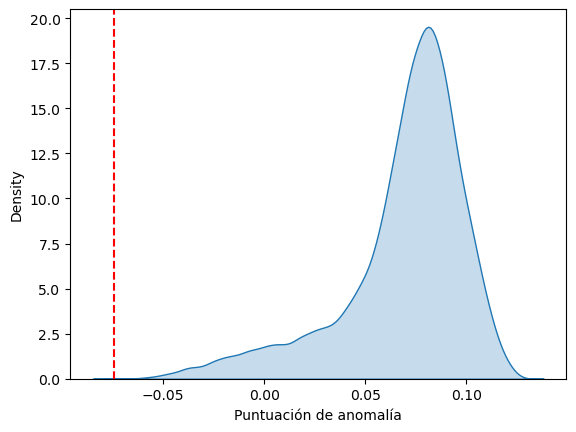

In [18]:
# FUNCION DE DENSIDAD (ANOMALY SCORE)

ax = sns.distplot(IF_anomalyscore, hist=False, kde=True, kde_kws={"shade":True}, axlabel="Puntuación de anomalía")
ax.axvline(x = anomaly_umbral,    # Line on x = anomaly_umbral
           ymin = 0, # Bottom of the plot
           ymax = 1, color= 'r', linestyle='--') # Top of the plot
plt.show()

In [20]:
escribir_archivo_binario(model_IF, 'IF_model.pkl')

# FASE 2: PREPARAR DATOS

In [ ]:
# RFECV feature selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

dtree = DecisionTreeClassifier()

rfe = RFECV(estimator=dtree, n_jobs=-1)
rfe.fit(X_train, y_train)

In [5]:
# ELIMINAMOS ESTA COLUMNA FICTICIA EN EL DATAFRAME PARA PODER OBTENER LAS FEATURES EN RFECV

no_unnamed = vine_dataset.drop(["Unnamed: 0"], axis=1)
no_unnamed.columns

Index(['session_id', 'comment_id', 'label', 'likes', 'this_comment_n_words',
       'session_comments_n_words', 'this_comment_pct_profane_words',
       'session_comments_pct_profane_words', 'session_pct_rude_comments',
       'this_comment_polarity',
       ...
       'session_comments_doc2vec_91', 'session_comments_doc2vec_92',
       'session_comments_doc2vec_93', 'session_comments_doc2vec_94',
       'session_comments_doc2vec_95', 'session_comments_doc2vec_96',
       'session_comments_doc2vec_97', 'session_comments_doc2vec_98',
       'session_comments_doc2vec_99', 'session_comments_doc2vec_100'],
      dtype='object', length=447)

In [9]:
# OBTENER 1OO MEJORES CARACTERÍSTICAS

rfe_rankings = rfe.ranking_

no_unnamed.columns[rfe_rankings < 50].tolist()

['session_id',
 'label',
 'likes',
 'time_difference_max',
 'time_difference_min',
 'session_comments_tfidf_6',
 'session_comments_tfidf_17',
 'session_comments_tfidf_29',
 'session_comments_tfidf_100',
 'session_comments_lda_topic_2',
 'session_comments_lda_topic_10',
 'this_comment_doc2vec_19',
 'this_comment_doc2vec_97',
 'session_comments_doc2vec_4',
 'session_comments_doc2vec_5',
 'session_comments_doc2vec_6',
 'session_comments_doc2vec_12',
 'session_comments_doc2vec_15',
 'session_comments_doc2vec_16',
 'session_comments_doc2vec_20',
 'session_comments_doc2vec_21',
 'session_comments_doc2vec_24',
 'session_comments_doc2vec_27',
 'session_comments_doc2vec_33',
 'session_comments_doc2vec_37',
 'session_comments_doc2vec_39',
 'session_comments_doc2vec_41',
 'session_comments_doc2vec_42',
 'session_comments_doc2vec_45',
 'session_comments_doc2vec_47',
 'session_comments_doc2vec_48',
 'session_comments_doc2vec_51',
 'session_comments_doc2vec_53',
 'session_comments_doc2vec_54',
 'ses

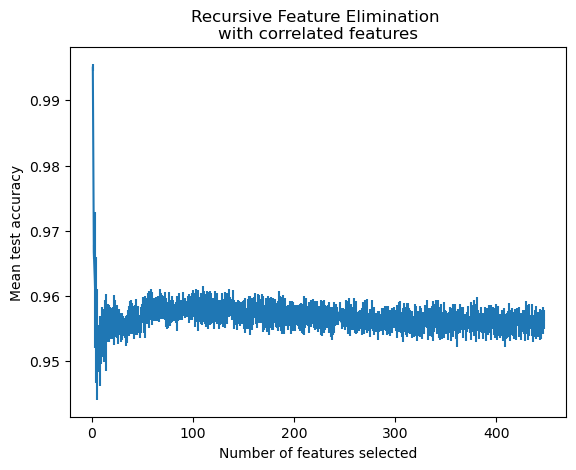

In [8]:
# PLOT RFECV NUMBER OF FEATURES VS CROSS-VALIDATION SCORES

n_scores = len(rfe.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(1, n_scores + 1),
    rfe.cv_results_["mean_test_score"],
    yerr=rfe.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [7]:
# PCA feature selection

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearnex import patch_sklearn

patch_sklearn()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)





Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [8]:
X_scaled

array([[-0.35824459, -1.24280584, -0.47828925, ..., -1.84209292,
        -0.07992019, -2.05584595],
       [ 1.57077904,  0.98097632, -0.86514869, ...,  0.65809068,
         0.43923711,  1.68527518],
       [ 0.04414845, -0.121649  , -0.46539393, ..., -0.27628355,
         1.54716938,  0.17871691],
       ...,
       [-0.37998059,  0.98097632,  1.50758925, ...,  1.5151053 ,
        -1.85416155, -0.91294161],
       [-1.55126148,  0.07293194, -0.80067212, ..., -0.24479233,
        -1.80172567,  0.07296973],
       [-1.33322417,  0.35090471, -0.15590637, ...,  1.15567263,
         0.88452764,  1.62291489]])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
escribir_archivo_binario(X_scaled, 'X_scaled.pkl')

In [11]:
pca = PCA(n_components=0.95, random_state=0)

pca.fit(X_scaled)
pca.transform(X_scaled)

array([[ 5.06295847e+00,  9.05254578e-01, -8.42281005e-01, ...,
         1.57641742e-01, -8.74494670e-01, -1.26241250e+00],
       [ 1.56208878e+00,  1.27454464e+00,  7.12047561e-03, ...,
         2.72631023e-01,  7.96398210e-01, -2.41990199e-01],
       [-7.01186475e+00, -1.28304279e+00, -5.65011982e-01, ...,
         2.17966998e-02,  5.34531782e-02, -8.66368295e-01],
       ...,
       [ 2.93947899e+00,  1.47451528e+00,  2.04032687e+00, ...,
         2.51662971e-01,  2.56552822e-01,  4.42219744e-01],
       [ 9.48560217e+00,  6.74888972e-01,  3.65175875e+00, ...,
         1.67785934e-01, -6.17552286e-01,  1.04457969e-02],
       [ 4.78132146e+00, -4.00496319e+00,  2.04720817e+00, ...,
        -1.18172798e-02, -1.76032509e-01, -7.25360187e-01]])

In [13]:
escribir_archivo_binario(pca, 'pca_model.pkl')

array([[-0.02372278, -0.0010056 , -0.00064078, ..., -0.00572741,
        -0.00395108,  0.01601108],
       [ 0.00573222, -0.00192361, -0.03088385, ...,  0.0102111 ,
        -0.00698963, -0.02069136],
       [-0.23411719,  0.00161999, -0.04745562, ..., -0.00913243,
        -0.00197802,  0.0575986 ],
       ...,
       [ 0.01433168,  0.00475745,  0.03410219, ..., -0.03412066,
        -0.01926149, -0.09579175],
       [-0.00641548,  0.00332107, -0.00132914, ..., -0.01796775,
        -0.06761004,  0.03159504],
       [ 0.02235305,  0.01053229,  0.02945481, ..., -0.02357201,
        -0.10568494, -0.0245025 ]])

In [14]:
# OBTENER CARACTERÍSTICAS MÁS ASOCIADAS CON CADA COMPONENTE


#pca.components_

PC_columns = ['PC-' + str(i) for i in range(len(pca.explained_variance_ratio_))]

PC_df = pd.DataFrame(pca.components_,columns=X_train.columns,index = PC_columns)

PC_df.idxmax(axis="columns")

PC-0          this_comment_doc2vec_23
PC-1          this_comment_doc2vec_78
PC-2        session_pct_rude_comments
PC-3        session_comments_tfidf_45
PC-4        session_comments_tfidf_70
                     ...             
PC-243      session_comments_tfidf_37
PC-244      session_comments_tfidf_22
PC-245      session_comments_tfidf_78
PC-246       this_comment_lda_topic_9
PC-247    session_comments_doc2vec_79
Length: 248, dtype: object

In [17]:
PC_df

,Unnamed: 0,session_id,comment_id,likes,this_comment_n_words,session_comments_n_words,this_comment_pct_profane_words,session_comments_pct_profane_words,session_pct_rude_comments,this_comment_polarity,...,session_comments_doc2vec_91,session_comments_doc2vec_92,session_comments_doc2vec_93,session_comments_doc2vec_94,session_comments_doc2vec_95,session_comments_doc2vec_96,session_comments_doc2vec_97,session_comments_doc2vec_98,session_comments_doc2vec_99,session_comments_doc2vec_100
PC-0,-0.023723,-0.001006,-0.000641,-0.010714,0.106029,0.020313,-0.008262,-0.007272,0.021827,-0.002288,...,-0.008106,-0.004300,0.008030,-0.003849,0.014291,0.011462,-0.014824,-0.005727,-0.003951,0.016011
PC-1,0.005732,-0.001924,-0.030884,-0.001502,0.028189,-0.046370,0.026231,0.063873,0.023187,0.012747,...,0.011282,0.015646,-0.018031,0.005574,0.000664,-0.010991,0.016971,0.010211,-0.006990,-0.020691
PC-2,-0.234117,0.001620,-0.047456,-0.158495,0.011043,-0.000850,0.123781,0.202618,0.230058,-0.064197,...,-0.078482,-0.026066,0.018434,0.021092,0.023421,0.050990,-0.026210,-0.009132,-0.001978,0.057599
PC-3,-0.004192,-0.001364,-0.179162,-0.063936,-0.000989,-0.203939,0.035302,0.057794,0.031034,0.018889,...,-0.028442,-0.025128,-0.062023,0.022095,-0.043769,0.020541,0.048628,0.008261,0.026289,-0.074197
PC-4,-0.006349,0.000798,0.156061,0.070961,-0.000257,0.136311,-0.006547,-0.020337,-0.019019,-0.010694,...,0.053592,0.000832,0.052113,0.003519,-0.030705,-0.007883,0.003643,-0.036108,-0.036874,0.017046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PC-243,-0.024598,-0.003105,0.017624,-0.065092,0.000087,0.043887,-0.134051,-0.025791,-0.031995,-0.003042,...,0.023058,0.018271,-0.045160,0.127217,-0.074177,-0.002229,0.008818,0.011584,-0.011310,0.105988
PC-244,0.091531,0.000367,0.050688,-0.018632,0.003528,0.053176,-0.016598,-0.027620,-0.028823,-0.013337,...,-0.001521,0.124155,-0.004794,0.070005,0.049300,0.028422,-0.000782,-0.011263,-0.058145,0.013403
PC-245,0.014332,0.004757,0.034102,0.040237,0.000299,0.030544,0.015815,0.003559,-0.006276,0.008804,...,0.013331,-0.020912,0.031478,-0.067645,0.015711,0.012422,0.140167,-0.034121,-0.019261,-0.095792
PC-246,-0.006415,0.003321,-0.001329,0.036264,0.007339,-0.016003,-0.018413,-0.017562,-0.006216,0.048106,...,-0.039073,-0.058823,-0.014834,0.035872,-0.040865,0.004609,0.138046,-0.017968,-0.067610,0.031595


In [15]:
PC_max = PC_df.idxmax(axis="columns").values

PC_max

#vine_dataset[PC_max]

array(['this_comment_doc2vec_23', 'this_comment_doc2vec_78',
       'session_pct_rude_comments', 'session_comments_tfidf_45',
       'session_comments_tfidf_70', 'session_comments_tfidf_25',
       'session_comments_tfidf_8', 'session_comments_lda_topic_7',
       'session_pct_subjective_comments', 'time_difference_mean',
       'session_comments_lda_topic_10', 'session_comments_lda_topic_9',
       'time_difference_mean', 'session_comments_tfidf_4',
       'session_comments_tfidf_19', 'session_comments_tfidf_31',
       'session_comments_tfidf_10', 'session_comments_tfidf_16',
       'session_comments_tfidf_47', 'session_comments_tfidf_73',
       'session_comments_tfidf_47', 'session_comments_lda_topic_2',
       'session_comments_tfidf_31', 'session_comments_doc2vec_65',
       'this_comment_polarity', 'session_comments_tfidf_11',
       'this_comment_polarity', 'session_comments_doc2vec_29',
       'session_comments_tfidf_30', 'session_comments_doc2vec_18',
       'session_comments

In [18]:
# ELIMINAR DUPLICADOS

PC_notduplicates = []

for caracteristica in PC_max:
    if(caracteristica not in PC_notduplicates):
        PC_notduplicates.append(caracteristica)
        
print(PC_notduplicates)

['this_comment_doc2vec_23', 'this_comment_doc2vec_78', 'session_pct_rude_comments', 'session_comments_tfidf_45', 'session_comments_tfidf_70', 'session_comments_tfidf_25', 'session_comments_tfidf_8', 'session_comments_lda_topic_7', 'session_pct_subjective_comments', 'time_difference_mean', 'session_comments_lda_topic_10', 'session_comments_lda_topic_9', 'session_comments_tfidf_4', 'session_comments_tfidf_19', 'session_comments_tfidf_31', 'session_comments_tfidf_10', 'session_comments_tfidf_16', 'session_comments_tfidf_47', 'session_comments_tfidf_73', 'session_comments_lda_topic_2', 'session_comments_doc2vec_65', 'this_comment_polarity', 'session_comments_tfidf_11', 'session_comments_doc2vec_29', 'session_comments_tfidf_30', 'session_comments_doc2vec_18', 'session_comments_doc2vec_20', 'session_comments_doc2vec_41', 'this_comment_tfidf_14', 'session_comments_tfidf_79', 'this_comment_lda_topic_1', 'session_comments_doc2vec_25', 'session_comments_doc2vec_13', 'session_comments_tfidf_65', 

In [21]:
len(PC_notduplicates)

154

In [ ]:
# VISUALIZAR MEJOR CIERTAS CARACTERÍSTICAS DE PCA

PCA_filtro = filter(lambda feature: "lda" in feature, PC_notduplicates)

PCA_lista = list(PCA_filtro)

PCA_lista

In [ ]:
print(len(PCA_lista))

In [20]:
escribir_archivo_binario(PC_notduplicates, 'pca_mainfeatures.pkl')

# FASE 3: MODELADO

In [15]:
print(PC_notduplicates)

['this_comment_doc2vec_23', 'this_comment_doc2vec_78', 'session_pct_rude_comments', 'session_comments_tfidf_45', 'session_comments_tfidf_70', 'session_comments_tfidf_25', 'session_comments_tfidf_8', 'session_comments_lda_topic_7', 'session_pct_subjective_comments', 'time_difference_mean', 'session_comments_lda_topic_10', 'session_comments_lda_topic_9', 'session_comments_tfidf_4', 'session_comments_tfidf_19', 'session_comments_tfidf_31', 'session_comments_tfidf_10', 'session_comments_tfidf_16', 'session_comments_tfidf_47', 'session_comments_tfidf_73', 'session_comments_lda_topic_2', 'session_comments_doc2vec_65', 'this_comment_polarity', 'session_comments_tfidf_11', 'session_comments_doc2vec_29', 'session_comments_tfidf_30', 'session_comments_doc2vec_18', 'session_comments_doc2vec_20', 'session_comments_doc2vec_41', 'this_comment_tfidf_14', 'session_comments_tfidf_79', 'this_comment_lda_topic_1', 'session_comments_doc2vec_25', 'session_comments_doc2vec_13', 'session_comments_tfidf_65', 

In [5]:
X_train = leer_archivo_binario('X_train.pkl')
X_test = leer_archivo_binario('X_test.pkl')
y_train = leer_archivo_binario('y_train.pkl')
y_test = leer_archivo_binario('y_test.pkl')

In [6]:
X_train

,Unnamed: 0,session_id,comment_id,likes,this_comment_n_words,session_comments_n_words,this_comment_pct_profane_words,session_comments_pct_profane_words,session_pct_rude_comments,this_comment_polarity,...,session_comments_doc2vec_91,session_comments_doc2vec_92,session_comments_doc2vec_93,session_comments_doc2vec_94,session_comments_doc2vec_95,session_comments_doc2vec_96,session_comments_doc2vec_97,session_comments_doc2vec_98,session_comments_doc2vec_99,session_comments_doc2vec_100
22274,22274,106,42,1000,8,265,0.000000,0.064151,0.285714,0.250000,...,0.195942,0.305190,0.401742,-0.362092,-0.228446,-0.541968,0.527637,-0.863058,0.107400,-1.516618
53602,53602,586,12,12292,6,54,0.500000,0.055556,0.083333,-0.900000,...,-0.313900,-0.276601,0.052639,0.622827,0.049623,-0.188133,0.248322,0.349393,0.364028,0.443663
28809,28809,348,43,2237,4,245,0.000000,0.061224,0.186047,0.000000,...,-0.260761,-0.711974,-0.232354,0.117050,0.252321,-0.434961,-0.039503,-0.103726,0.911696,-0.345746
42715,42715,661,29,2229,1,114,0.000000,0.017544,0.068966,0.000000,...,-1.654990,-0.076858,0.143158,-0.461724,-0.981620,0.123591,0.524086,0.154125,0.094823,-0.508638
40045,40045,656,3,378,4,8,0.000000,0.125000,0.333333,0.000000,...,0.237058,0.147290,-0.138048,-0.084174,0.066864,0.049887,-0.157194,0.157131,-0.163926,-0.228605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50502,50502,128,59,1113,2,246,0.000000,0.004065,0.016949,0.000000,...,-0.479887,-0.174512,-0.608152,0.169059,0.447284,0.311692,-0.546390,-1.100315,0.282739,-0.365501
49375,49375,545,74,10191,3,437,0.000000,0.032037,0.148649,0.250000,...,0.232982,-0.303353,-0.404543,0.026424,-0.132495,-0.431463,0.316530,0.930050,-0.764511,-0.249582
21921,21921,586,196,1723,6,823,0.166667,0.041312,0.158163,0.000000,...,-0.186142,0.103854,0.308920,0.247762,0.187380,0.185051,0.098770,0.764998,-0.769634,-0.917756
2899,2899,390,17,1817,9,117,0.333333,0.136752,0.588235,-0.288889,...,-0.378261,-0.221242,0.700558,0.485424,0.624670,-0.245315,-0.483212,-0.088455,-0.743714,-0.401156


In [11]:
y_train

22274    1
53602    0
28809    0
42715    0
40045    0
        ..
50502    0
49375    0
21921    0
2899     1
6440     1
Name: label, Length: 42149, dtype: int64

In [21]:
y_train.loc[[22274, 53602, 6440]]

22274    1
53602    0
6440     1
Name: label, dtype: int64

In [7]:
y_model = y_train.copy()

y_model = y_model.reset_index(drop=True)

y_model

0        1
1        0
2        0
3        0
4        0
        ..
42144    0
42145    0
42146    0
42147    1
42148    1
Name: label, Length: 42149, dtype: int64

In [8]:
X_trainval = X_train[PC_notduplicates]

X_trainval

,this_comment_doc2vec_23,this_comment_doc2vec_78,session_pct_rude_comments,session_comments_tfidf_45,session_comments_tfidf_70,session_comments_tfidf_25,session_comments_tfidf_8,session_comments_lda_topic_7,session_pct_subjective_comments,time_difference_mean,...,session_comments_tfidf_22,this_comment_tfidf_10,session_comments_tfidf_3,session_comments_tfidf_94,this_comment_lda_topic_8,session_comments_tfidf_39,session_comments_doc2vec_21,session_comments_tfidf_43,session_comments_tfidf_37,session_comments_doc2vec_79
22274,0.175771,0.015620,0.285714,0.0,0.0,0.000000,0.000000,0.000746,0.619048,203.217460,...,0.0,0.0,0.094757,0.102909,0.220000,0.337280,-0.779278,0.000000,0.000000,-0.066199
53602,0.135604,0.006348,0.083333,0.0,0.0,0.000000,0.000000,0.003449,0.250000,1.965278,...,0.0,0.0,0.405363,0.000000,0.025000,0.000000,-0.054924,0.000000,0.000000,-0.198811
28809,0.047330,0.004998,0.186047,0.0,0.0,0.000000,0.000000,0.000935,0.488372,430.822093,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.281123,0.000000,0.000000,0.431488
42715,0.028515,0.003706,0.068966,0.0,0.0,0.000000,0.000000,0.045948,0.172414,22.631034,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.291241,0.000000,0.000000,0.189392
40045,0.107625,0.016921,0.333333,0.0,0.0,0.000000,0.000000,0.020003,0.333333,136.383333,...,0.0,0.0,0.000000,0.000000,0.361208,0.000000,-0.139915,0.000000,0.000000,0.067854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50502,0.044569,0.010927,0.016949,0.0,0.0,0.000000,0.000000,0.159684,0.101695,89.100847,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,0.823446,0.000000,0.000000,0.362861
49375,0.097036,0.010788,0.148649,0.0,0.0,0.000000,0.075864,0.000508,0.513514,5.993919,...,0.0,0.0,0.000000,0.000000,0.033333,0.071272,-0.330924,0.000000,0.000000,-0.191916
21921,0.153636,0.014636,0.158163,0.0,0.0,0.904637,0.000000,0.000271,0.464286,261.110969,...,0.0,0.0,0.000000,0.000000,0.025014,0.000000,-0.166528,0.034159,0.033544,0.348836
2899,0.219575,0.010824,0.588235,0.0,0.0,0.000000,0.000000,0.001852,0.294118,8.066667,...,0.0,0.0,0.000000,0.000000,0.016667,0.116589,-0.293813,0.000000,0.000000,0.113790


In [19]:
X_trainval.loc[[22274, 53602, 6440], :]

,this_comment_doc2vec_23,this_comment_doc2vec_78,session_pct_rude_comments,session_comments_tfidf_45,session_comments_tfidf_70,session_comments_tfidf_25,session_comments_tfidf_8,session_comments_lda_topic_7,session_pct_subjective_comments,time_difference_mean,...,session_comments_tfidf_22,this_comment_tfidf_10,session_comments_tfidf_3,session_comments_tfidf_94,this_comment_lda_topic_8,session_comments_tfidf_39,session_comments_doc2vec_21,session_comments_tfidf_43,session_comments_tfidf_37,session_comments_doc2vec_79
22274,0.175771,0.015620,0.285714,0.0,0.0,0.0,0.0,0.000746,0.619048,203.217460,...,0.0,0.0,0.094757,0.102909,0.220,0.33728,-0.779278,0.0,0.0,-0.066199
53602,0.135604,0.006348,0.083333,0.0,0.0,0.0,0.0,0.003449,0.250000,1.965278,...,0.0,0.0,0.405363,0.000000,0.025,0.00000,-0.054924,0.0,0.0,-0.198811
6440,0.167962,-0.006421,0.507463,0.0,0.0,0.0,0.0,0.000516,0.462687,82.903980,...,0.0,0.0,0.549966,0.132728,0.050,0.00000,-0.801026,0.0,0.0,-0.347017


In [9]:
X_testmodel = X_test[PC_notduplicates]

X_testmodel

,this_comment_doc2vec_23,this_comment_doc2vec_78,session_pct_rude_comments,session_comments_tfidf_45,session_comments_tfidf_70,session_comments_tfidf_25,session_comments_tfidf_8,session_comments_lda_topic_7,session_pct_subjective_comments,time_difference_mean,...,session_comments_tfidf_22,this_comment_tfidf_10,session_comments_tfidf_3,session_comments_tfidf_94,this_comment_lda_topic_8,session_comments_tfidf_39,session_comments_doc2vec_21,session_comments_tfidf_43,session_comments_tfidf_37,session_comments_doc2vec_79
31884,0.062208,0.003257,0.144201,0.0,0.0,0.000000,0.465677,0.000143,0.153605,27.748903,...,0.0,0.0,0.043381,0.070669,0.050000,0.000000,-0.066310,0.074285,0.024316,0.329344
11829,0.238968,0.010698,0.454545,0.0,0.0,0.000000,0.000000,0.001962,0.136364,65.362121,...,0.0,0.0,0.000000,0.000000,0.016667,0.000000,-0.109605,0.000000,0.000000,0.475764
12705,0.266361,0.030151,0.048485,0.0,0.0,0.942224,0.022116,0.000335,0.515152,26.788990,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.291530,0.000000,0.039263,0.664442
26380,0.019798,-0.002403,0.211538,0.0,0.0,0.000000,0.000000,0.001042,0.192308,111.507692,...,0.0,0.0,0.257753,0.186617,0.050000,0.000000,-0.081845,0.000000,0.000000,-0.028731
1922,0.088662,-0.003786,0.666667,0.0,0.0,0.000000,0.000000,0.001588,0.333333,0.304861,...,0.0,0.0,0.461652,0.100273,0.033333,0.000000,0.164213,0.000000,0.000000,0.231203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42750,0.089065,0.012168,0.062500,0.0,0.0,0.000000,0.000000,0.064755,0.156250,154.968750,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.244901,0.000000,0.000000,0.155107
8652,0.095474,0.011692,0.439394,0.0,0.0,0.000000,0.000000,0.145459,0.348485,306.028535,...,0.0,0.0,0.539488,0.073237,0.050000,0.000000,0.234601,0.000000,0.000000,-0.162865
44075,0.121779,0.005228,0.086957,0.0,0.0,0.000000,0.000000,0.000503,0.113043,27.591159,...,0.0,0.0,0.000000,0.000000,0.050000,0.000000,-0.150629,0.000000,0.000000,0.039531
7966,0.296144,-0.033390,0.650943,0.0,0.0,0.000000,0.000000,0.000194,0.443396,25.886321,...,0.0,0.0,0.247776,0.000000,0.012502,0.133627,-0.191223,0.000000,0.025251,-0.000629


In [10]:
X_model = X_trainval.copy()

X_model = X_model.reset_index(drop=True)

X_model

,this_comment_doc2vec_23,this_comment_doc2vec_78,session_pct_rude_comments,session_comments_tfidf_45,session_comments_tfidf_70,session_comments_tfidf_25,session_comments_tfidf_8,session_comments_lda_topic_7,session_pct_subjective_comments,time_difference_mean,...,session_comments_tfidf_22,this_comment_tfidf_10,session_comments_tfidf_3,session_comments_tfidf_94,this_comment_lda_topic_8,session_comments_tfidf_39,session_comments_doc2vec_21,session_comments_tfidf_43,session_comments_tfidf_37,session_comments_doc2vec_79
0,0.175771,0.015620,0.285714,0.0,0.0,0.000000,0.000000,0.000746,0.619048,203.217460,...,0.0,0.0,0.094757,0.102909,0.220000,0.337280,-0.779278,0.000000,0.000000,-0.066199
1,0.135604,0.006348,0.083333,0.0,0.0,0.000000,0.000000,0.003449,0.250000,1.965278,...,0.0,0.0,0.405363,0.000000,0.025000,0.000000,-0.054924,0.000000,0.000000,-0.198811
2,0.047330,0.004998,0.186047,0.0,0.0,0.000000,0.000000,0.000935,0.488372,430.822093,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.281123,0.000000,0.000000,0.431488
3,0.028515,0.003706,0.068966,0.0,0.0,0.000000,0.000000,0.045948,0.172414,22.631034,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,-0.291241,0.000000,0.000000,0.189392
4,0.107625,0.016921,0.333333,0.0,0.0,0.000000,0.000000,0.020003,0.333333,136.383333,...,0.0,0.0,0.000000,0.000000,0.361208,0.000000,-0.139915,0.000000,0.000000,0.067854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42144,0.044569,0.010927,0.016949,0.0,0.0,0.000000,0.000000,0.159684,0.101695,89.100847,...,0.0,0.0,0.000000,0.000000,0.100000,0.000000,0.823446,0.000000,0.000000,0.362861
42145,0.097036,0.010788,0.148649,0.0,0.0,0.000000,0.075864,0.000508,0.513514,5.993919,...,0.0,0.0,0.000000,0.000000,0.033333,0.071272,-0.330924,0.000000,0.000000,-0.191916
42146,0.153636,0.014636,0.158163,0.0,0.0,0.904637,0.000000,0.000271,0.464286,261.110969,...,0.0,0.0,0.000000,0.000000,0.025014,0.000000,-0.166528,0.034159,0.033544,0.348836
42147,0.219575,0.010824,0.588235,0.0,0.0,0.000000,0.000000,0.001852,0.294118,8.066667,...,0.0,0.0,0.000000,0.000000,0.016667,0.116589,-0.293813,0.000000,0.000000,0.113790


,session_id,comment_id,likes,this_comment_n_words,session_comments_n_words,this_comment_pct_profane_words,session_comments_pct_profane_words,session_pct_rude_comments,this_comment_polarity,this_comment_subjectivity,...,session_comments_doc2vec_91,session_comments_doc2vec_92,session_comments_doc2vec_93,session_comments_doc2vec_94,session_comments_doc2vec_95,session_comments_doc2vec_96,session_comments_doc2vec_97,session_comments_doc2vec_98,session_comments_doc2vec_99,session_comments_doc2vec_100
0,106,42,1000,8,265,0.000000,0.064151,0.285714,0.250000,0.850000,...,0.195942,0.305190,0.401742,-0.362092,-0.228446,-0.541968,0.527637,-0.863058,0.107400,-1.516618
1,586,12,12292,6,54,0.500000,0.055556,0.083333,-0.900000,1.000000,...,-0.313900,-0.276601,0.052639,0.622827,0.049623,-0.188133,0.248322,0.349393,0.364028,0.443663
2,348,43,2237,4,245,0.000000,0.061224,0.186047,0.000000,0.000000,...,-0.260761,-0.711974,-0.232354,0.117050,0.252321,-0.434961,-0.039503,-0.103726,0.911696,-0.345746
3,661,29,2229,1,114,0.000000,0.017544,0.068966,0.000000,0.000000,...,-1.654990,-0.076858,0.143158,-0.461724,-0.981620,0.123591,0.524086,0.154125,0.094823,-0.508638
4,656,3,378,4,8,0.000000,0.125000,0.333333,0.000000,0.000000,...,0.237058,0.147290,-0.138048,-0.084174,0.066864,0.049887,-0.157194,0.157131,-0.163926,-0.228605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42144,128,59,1113,2,246,0.000000,0.004065,0.016949,0.000000,0.000000,...,-0.479887,-0.174512,-0.608152,0.169059,0.447284,0.311692,-0.546390,-1.100315,0.282739,-0.365501
42145,545,74,10191,3,437,0.000000,0.032037,0.148649,0.250000,0.850000,...,0.232982,-0.303353,-0.404543,0.026424,-0.132495,-0.431463,0.316530,0.930050,-0.764511,-0.249582
42146,586,196,1723,6,823,0.166667,0.041312,0.158163,0.000000,0.000000,...,-0.186142,0.103854,0.308920,0.247762,0.187380,0.185051,0.098770,0.764998,-0.769634,-0.917756
42147,390,17,1817,9,117,0.333333,0.136752,0.588235,-0.288889,0.811111,...,-0.378261,-0.221242,0.700558,0.485424,0.624670,-0.245315,-0.483212,-0.088455,-0.743714,-0.401156


In [11]:
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

grid_Gaussian = {'var_smoothing': [1e-5, 1e-6, 1e-7, 1e-8, 1e-9]}
grid_AdaBoost = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.01, 0.001], 'random_state': [42]}
grid_LinearSVC = {'tol': [1e-3, 1e-4], 'C': [0.1, 1, 10], 'random_state': [42]}
grid_RandomForest = {'n_estimators': [10, 100, 500], 'max_depth': [3, 5, 7, None], 'random_state': [42]}

In [17]:
# APPLYING HYPERPARAMETRIZATION (GRID SEARCH)

from sklearn.model_selection import StratifiedKFold

import time

skf = StratifiedKFold(n_splits = 5)



In [ ]:
from sklearnex import patch_sklearn

patch_sklearn()

In [51]:
mejores_parametros = []

resultados_grid = []


for fold, (train_index, test_index) in enumerate(skf.split(X_model, y_model)):                                               
    
    inicio = time.time()

    #grid_search = GridSearchCV(estimator=GaussianNB(), param_grid = grid_Gaussian, cv = 5)
    grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid = grid_AdaBoost, cv = 5, n_jobs = -1)
    #grid_search = GridSearchCV(estimator=LinearSVC(), param_grid = grid_LinearSVC, cv = 5, n_jobs = -1)
    #grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid = grid_RandomForest, cv = 5, n_jobs = -1)


    grid_search.fit(X_model.loc[train_index, :], y_model.loc[train_index])
    
    fin = time.time()

    tiempo = fin-inicio
    
    mejores_parametros.append([fold, grid_search.best_params_, grid_search.best_score_, tiempo])
    
    resultados_grid.append([fold, grid_search.cv_results_])
    

In [52]:
mejores_parametros

[[0,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8851984061851234,
  242.37658619880676],
 [1,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8826776381956843,
  228.7578935623169],
 [2,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8841011213421271,
  230.34756779670715],
 [3,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8844866272285532,
  228.06025767326355],
 [4,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8833629893238435,
  237.92804145812988]]

In [53]:
resultados_grid

[[0,
  {'mean_fit_time': array([20.42671447, 34.80246792, 56.14751964, 13.55560441, 27.30250587,
          54.10946069, 13.08409166, 26.52811022, 44.98072095]),
   'std_fit_time': array([0.89258272, 4.09654922, 2.88579172, 0.92196479, 1.10037448,
          2.44665119, 0.38926753, 1.18550841, 0.75633908]),
   'mean_score_time': array([0.34090385, 0.73328528, 1.2025578 , 0.32179899, 0.57280445,
          1.25203266, 0.29055676, 0.57212024, 0.74044533]),
   'std_score_time': array([0.02263732, 0.13061823, 0.09484581, 0.05095527, 0.01439784,
          0.13441267, 0.00765296, 0.04054735, 0.18127042]),
   'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001],
                mask=[False, False, False, False, False, False, False, False,
                      False],
          fill_value='?',
               dtype=object),
   'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
                mask=[False, False, False, Fa

In [16]:
grid_search.best_params_

{'var_smoothing': 1e-07}

In [54]:
escribir_archivo_binario(mejores_parametros, 'GSearch_params_AdaBoost.pkl')

In [55]:
escribir_archivo_binario(resultados_grid, 'GSearch_results_AdaBoost.pkl')

In [17]:
print(tiempo)

3.163381814956665


In [18]:
escribir_archivo_binario(grid_search, 'GSearch_GaussianNB.pkl')

In [6]:
grid_search_AdaBoost.best_score_

0.883674666078965

In [7]:
grid_search_LinearSVC.best_score_

0.8203520411301038

In [8]:
grid_search_RandomForest.best_score_

0.8352274296767066

In [20]:
grid_search_GaussianNB.best_score_

0.8120477924107403

In [21]:
grid_search_AdaBoost.cv_results_

{'mean_fit_time': array([ 8.93178973, 17.66752925, 35.27759867,  8.83283482, 17.68159094,
        35.40872741,  8.94479542, 17.63249812, 35.25781541]),
 'std_fit_time': array([0.04695157, 0.09284168, 0.09393563, 0.03673536, 0.06324217,
        0.44552996, 0.10536033, 0.01401521, 0.06206726]),
 'mean_score_time': array([0.13131914, 0.26557956, 0.52080655, 0.131213  , 0.26893368,
        0.53324428, 0.13515668, 0.26106939, 0.52487512]),
 'std_score_time': array([0.00757484, 0.00988026, 0.00595946, 0.00763497, 0.00678223,
        0.02174258, 0.00675387, 0.00905105, 0.01874926]),
 'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
  

In [22]:
grid_search_LinearSVC.cv_results_

{'mean_fit_time': array([7.71577888, 7.89671288, 7.92472644, 8.61516027, 7.76581383,
        7.70626211]),
 'std_fit_time': array([0.11188894, 0.26225174, 0.10173117, 0.64221734, 0.31374262,
        0.09767945]),
 'mean_score_time': array([0.03122573, 0.00775895, 0.00119033, 0.0064393 , 0.00742378,
        0.01248474]),
 'std_score_time': array([0.04738656, 0.00685297, 0.00238066, 0.00595652, 0.00701509,
        0.00624242]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[42, 42, 42, 42, 42, 42],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tol': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 

In [23]:
grid_search_RandomForest.cv_results_

{'mean_fit_time': array([0.2139257 , 0.32642756, 0.25353212, 0.44460597, 0.27182326,
        0.44391317]),
 'std_fit_time': array([0.02038512, 0.00966264, 0.01181622, 0.01580173, 0.01874713,
        0.00795963]),
 'mean_score_time': array([0.01625943, 0.01961298, 0.01561742, 0.01874752, 0.01874108,
        0.02809911]),
 'std_score_time': array([2.62099495e-03, 6.05685307e-03, 1.23439133e-05, 6.24885565e-03,
        6.23645807e-03, 6.23829615e-03]),
 'param_max_depth': masked_array(data=[2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 100, 200, 100, 200],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[42, 42, 42, 42, 42, 42],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'p

In [24]:
grid_search_GaussianNB.cv_results_

{'mean_fit_time': array([0.09435625, 0.09276385, 0.09386358, 0.10621395, 0.09372292]),
 'std_fit_time': array([4.41344632e-03, 1.93859480e-03, 4.39922959e-04, 6.24498337e-03,
        1.05407979e-05]),
 'mean_score_time': array([0.01814475, 0.01873636, 0.02499065, 0.01875582, 0.02812333]),
 'std_score_time': array([0.00899828, 0.00625364, 0.00763285, 0.00624328, 0.0062512 ]),
 'param_var_smoothing': masked_array(data=[1e-05, 1e-06, 1e-07, 1e-08, 1e-09],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'var_smoothing': 1e-05},
  {'var_smoothing': 1e-06},
  {'var_smoothing': 1e-07},
  {'var_smoothing': 1e-08},
  {'var_smoothing': 1e-09}],
 'split0_test_score': array([0.71648873, 0.79584816, 0.80640569, 0.7633452 , 0.75812574]),
 'split1_test_score': array([0.71720047, 0.79857651, 0.81720047, 0.78220641, 0.7747331 ]),
 'split2_test_score': array([0.71779359, 0.80260973, 0.81447212, 0.76631079, 0.75765125]),
 'split3_te

In [25]:
from sklearn.model_selection import cross_val_score

cross_scores_GaussianNB = cross_val_score(GridSearchCV(estimator=GaussianNB(), param_grid = grid_Gaussian, cv = 5),
                                          X_trainval, y_train, cv = 5)

print(cross_scores_GaussianNB)

[0.80640569 0.81720047 0.81447212 0.80771056 0.81445011]


In [28]:
cross_scores_AdaBoost = cross_val_score(GridSearchCV(estimator=AdaBoostClassifier(), param_grid = grid_AdaBoost, cv = 5),
                                          X_trainval, y_train, cv = 5, n_jobs = -1)

print(cross_scores_AdaBoost)

[0.88232503 0.88446026 0.88208778 0.88232503 0.88717523]


In [29]:
cross_scores_LinearSVC = cross_val_score(GridSearchCV(estimator=LinearSVC(), param_grid = grid_LinearSVC, cv = 5),
                                          X_trainval, y_train, cv = 5, n_jobs = -1)

print(cross_scores_LinearSVC)

[0.8029656  0.79395018 0.75468565 0.74223013 0.83853363]


In [26]:
cross_scores_RandomForest = cross_val_score(GridSearchCV(estimator=RandomForestClassifier(), param_grid = grid_RandomForest, cv = 5),
                                          X_trainval, y_train, cv = 5)

In [27]:
print(cross_scores_RandomForest)

[0.83807829 0.84068802 0.84400949 0.8396204  0.83817772]


In [12]:
# CARGAR RESULTADOS GRID SEARCH

params_AdaBoost = leer_archivo_binario('GSearch_params_AdaBoost.pkl')
results_AdaBoost = leer_archivo_binario('GSearch_results_AdaBoost.pkl')

params_LinearSVC = leer_archivo_binario('GSearch_params_LinearSVC.pkl')
results_LinearSVC = leer_archivo_binario('GSearch_results_LinearSVC.pkl')

params_GaussianNB = leer_archivo_binario('GSearch_params_GaussianNB.pkl')
results_GaussianNB = leer_archivo_binario('GSearch_results_GaussianNB.pkl')

params_RandomForest = leer_archivo_binario('GSearch_params_RandomForest.pkl')
results_RandomForest = leer_archivo_binario('GSearch_results_RandomForest.pkl')

In [13]:
params_AdaBoost

[[0,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8851984061851234,
  242.37658619880676],
 [1,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8826776381956843,
  228.7578935623169],
 [2,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8841011213421271,
  230.34756779670715],
 [3,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8844866272285532,
  228.06025767326355],
 [4,
  {'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42},
  0.8833629893238435,
  237.92804145812988]]

In [14]:
results_AdaBoost

[[0,
  {'mean_fit_time': array([20.42671447, 34.80246792, 56.14751964, 13.55560441, 27.30250587,
          54.10946069, 13.08409166, 26.52811022, 44.98072095]),
   'std_fit_time': array([0.89258272, 4.09654922, 2.88579172, 0.92196479, 1.10037448,
          2.44665119, 0.38926753, 1.18550841, 0.75633908]),
   'mean_score_time': array([0.34090385, 0.73328528, 1.2025578 , 0.32179899, 0.57280445,
          1.25203266, 0.29055676, 0.57212024, 0.74044533]),
   'std_score_time': array([0.02263732, 0.13061823, 0.09484581, 0.05095527, 0.01439784,
          0.13441267, 0.00765296, 0.04054735, 0.18127042]),
   'param_learning_rate': masked_array(data=[0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001],
                mask=[False, False, False, False, False, False, False, False,
                      False],
          fill_value='?',
               dtype=object),
   'param_n_estimators': masked_array(data=[50, 100, 200, 50, 100, 200, 50, 100, 200],
                mask=[False, False, False, Fa

In [15]:
params_LinearSVC

[[0,
  {'C': 0.1, 'random_state': 42, 'tol': 0.001},
  0.7952501948771971,
  81.48552131652832],
 [1,
  {'C': 10, 'random_state': 42, 'tol': 0.001},
  0.8072899332887549,
  72.59342241287231],
 [2,
  {'C': 0.1, 'random_state': 42, 'tol': 0.001},
  0.7996396377140108,
  72.63546752929688],
 [3,
  {'C': 1, 'random_state': 42, 'tol': 0.001},
  0.819716167145965,
  73.8156418800354],
 [4,
  {'C': 0.1, 'random_state': 42, 'tol': 0.001},
  0.759608540925267,
  72.98414921760559]]

In [16]:
results_LinearSVC

[[0,
  {'mean_fit_time': array([16.83135872, 16.84887595, 17.03114285, 17.20478158, 16.23626118,
          13.96421418]),
   'std_fit_time': array([0.63840794, 0.60594583, 0.66129824, 0.74346657, 1.14052036,
          0.30102093]),
   'mean_score_time': array([0.04374208, 0.02187181, 0.00937347, 0.01874623, 0.01562033,
          0.00311832]),
   'std_score_time': array([0.02863787, 0.00765434, 0.00765341, 0.00624831, 0.01711154,
          0.00623665]),
   'param_C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10],
                mask=[False, False, False, False, False, False],
          fill_value='?',
               dtype=object),
   'param_random_state': masked_array(data=[42, 42, 42, 42, 42, 42],
                mask=[False, False, False, False, False, False],
          fill_value='?',
               dtype=object),
   'param_tol': masked_array(data=[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001],
                mask=[False, False, False, False, False, False],
          fill_value='?',
  

In [17]:
params_GaussianNB

[[0, {'var_smoothing': 1e-07}, 0.8131025426130591, 2.5611422061920166],
 [1, {'var_smoothing': 1e-07}, 0.8102258411649249, 2.5170681476593018],
 [2, {'var_smoothing': 1e-07}, 0.810611413021966, 2.5775482654571533],
 [3, {'var_smoothing': 1e-07}, 0.8131914797983024, 2.6086227893829346],
 [4, {'var_smoothing': 1e-07}, 0.8117437722419929, 2.4851057529449463]]

In [18]:
results_GaussianNB

[[0,
  {'mean_fit_time': array([0.06957316, 0.07477956, 0.08269782, 0.07498226, 0.07811561]),
   'std_fit_time': array([6.08172975e-03, 7.09747154e-03, 3.91692426e-03, 6.24855503e-03,
          9.99608100e-06]),
   'mean_score_time': array([0.02480145, 0.01942306, 0.01561313, 0.01875315, 0.01894889]),
   'std_score_time': array([6.41882642e-03, 6.05550149e-03, 3.30522111e-05, 6.24497571e-03,
          6.67747329e-03]),
   'param_var_smoothing': masked_array(data=[1e-05, 1e-06, 1e-07, 1e-08, 1e-09],
                mask=[False, False, False, False, False],
          fill_value='?',
               dtype=object),
   'params': [{'var_smoothing': 1e-05},
    {'var_smoothing': 1e-06},
    {'var_smoothing': 1e-07},
    {'var_smoothing': 1e-08},
    {'var_smoothing': 1e-09}],
   'split0_test_score': array([0.71678529, 0.80056346, 0.81672598, 0.78010083, 0.77431791]),
   'split1_test_score': array([0.71723013, 0.79255635, 0.81524318, 0.77239027, 0.76720047]),
   'split2_test_score': array([0.71

In [19]:
params_RandomForest

[[0,
  {'max_depth': None, 'n_estimators': 500, 'random_state': 42},
  0.9762448347207393,
  209.2689917087555],
 [1,
  {'max_depth': None, 'n_estimators': 100, 'random_state': 42},
  0.9751771794800073,
  161.13199424743652],
 [2,
  {'max_depth': None, 'n_estimators': 500, 'random_state': 42},
  0.9763338246824744,
  208.6496651172638],
 [3,
  {'max_depth': None, 'n_estimators': 500, 'random_state': 42},
  0.9757406916781498,
  207.92735743522644],
 [4,
  {'max_depth': None, 'n_estimators': 500, 'random_state': 42},
  0.9749406880189799,
  206.87927556037903]]

In [20]:
results_RandomForest

[[0,
  {'mean_fit_time': array([ 0.46857548,  3.53870611, 18.86002579,  0.6805428 ,  5.60535793,
          29.2191999 ,  0.85952311,  7.78539481, 39.63996949,  1.68035607,
          16.25740542, 67.51249442]),
   'std_fit_time': array([0.01168944, 0.03346404, 0.65647916, 0.01440717, 0.02516682,
          1.38232988, 0.01727774, 0.37872713, 1.95523131, 0.03971428,
          0.63905628, 1.79617763]),
   'mean_score_time': array([0.02186856, 0.07714744, 0.31572556, 0.02501774, 0.08775287,
          0.38856554, 0.02499452, 0.10934997, 0.48014431, 0.03124208,
          0.2093297 , 0.67189407]),
   'std_score_time': array([7.65377945e-03, 8.39519015e-03, 6.17076381e-03, 5.79756379e-03,
          5.97572233e-03, 7.06713807e-03, 7.65485018e-03, 1.71131523e-02,
          2.49391701e-02, 1.36044909e-06, 7.64832929e-03, 1.63242338e-01]),
   'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, None, None, None],
                mask=[False, False, False, False, False, False, False, Fal

# FASE 4: EVALUACION DE MODELOS

In [22]:
# CONSTRUIR MODELOS FINALES

modelo_gaussian = GaussianNB(var_smoothing = 1e-7)

modelo_adaboost = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state = 42)

modelo_linearSVC = LinearSVC(C = 1, tol = 1e-3, random_state = 42)

modelo_randomforest = RandomForestClassifier(n_estimators = 100, max_depth = 7, random_state = 42)


In [29]:
import time

inicio = time.time()

modelo_gaussian.fit(X_trainval, y_train)

fin = time.time()

tiempo = fin - inicio

In [30]:
predict_gaussian = modelo_gaussian.predict(X_testmodel)

predict_gaussian

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [31]:
tiempo

0.10338401794433594

In [32]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predict_gaussian).ravel()

(tn, fp, fn, tp)

(9163, 934, 1766, 2187)

In [33]:
inicio = time.time()

modelo_adaboost.fit(X_trainval, y_train)

fin = time.time()

tiempo = fin - inicio

In [34]:
predict_adaboost = modelo_adaboost.predict(X_testmodel)

predict_adaboost

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
tiempo

46.3624370098114

In [36]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_adaboost).ravel()

(tn, fp, fn, tp)


(9766, 331, 1290, 2663)

In [37]:
inicio = time.time()

modelo_linearSVC.fit(X_trainval, y_train)

fin = time.time()

tiempo = fin - inicio

C:\Users\mauro\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
predict_linearSVC = modelo_linearSVC.predict(X_testmodel)

predict_linearSVC

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [39]:
tiempo

9.991814851760864

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_linearSVC).ravel()

(tn, fp, fn, tp)

(8206, 1891, 1130, 2823)

In [41]:
inicio = time.time()

modelo_randomforest.fit(X_trainval, y_train)

fin = time.time()

tiempo = fin - inicio

In [42]:
predict_randomforest = modelo_randomforest.predict(X_testmodel)

predict_randomforest

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [43]:
tiempo

7.039487600326538

In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, predict_randomforest).ravel()

(tn, fp, fn, tp)

(10065, 32, 1270, 2683)

In [45]:
escribir_archivo_binario(modelo_gaussian, 'modelo_gaussian.pkl')

In [46]:
escribir_archivo_binario(modelo_adaboost, 'modelo_adaboost.pkl')

In [47]:
escribir_archivo_binario(modelo_linearSVC, 'modelo_linearSVC.pkl')

In [48]:
escribir_archivo_binario(modelo_randomforest, 'modelo_randomforest.pkl')

In [ ]:
modelo_gaussian = leer_archivo_binario('modelo_gaussian.pkl')
modelo_adaboost = leer_archivo_binario('modelo_adaboost.pkl')
modelo_linearSVC = leer_archivo_binario('modelo_linearSVC.pkl')
modelo_randomforest = leer_archivo_binario('modelo_randomforest.pkl')